In [1]:

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Workspace /Kannada-MNIST/Dig-MNIST.csv")
data.shape

(10240, 785)

In [4]:
labels = data['label']

In [5]:
# some parameters
input_size = 784 # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 128
learning_rate = 0.001

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
pixels= data.drop('label',axis =1)

In [8]:
labels

0        0
1        1
2        2
3        3
4        4
        ..
10235    5
10236    6
10237    7
10238    8
10239    9
Name: label, Length: 10240, dtype: int64

In [9]:
pixels

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, labels, pixels, transform=None, target_transform=None):
        self.labels =labels
        self.pixels = pixels
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        pixel_val = self.pixels[idx].astype(float)
        label_val = self.labels[idx]
        if self.transform:
            pixel_val = self.transform(pixel_val)
        if self.target_transform:
            label_val = self.target_transform(label_val)
        return pixel_val , label_val



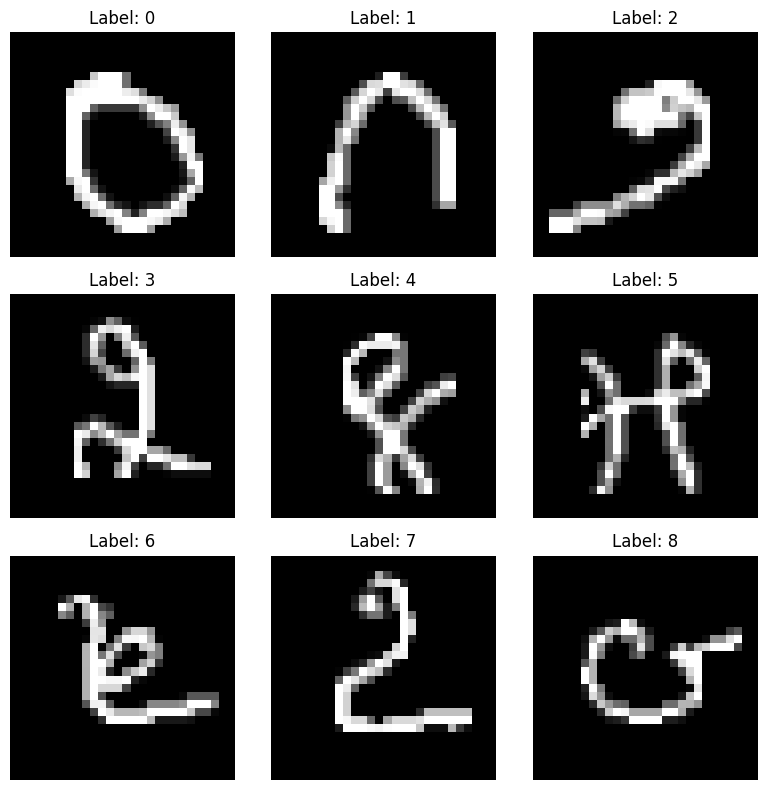

In [11]:
Data = CustomImageDataset(labels.values, pixels.values)
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for idx in range(9):
    pixel_values, label = Data[idx]
    image = pixel_values.reshape(28, 28)

    row_idx = idx // 3
    col_idx = idx % 3
    axes[row_idx, col_idx].imshow(image, cmap='gray')
    axes[row_idx, col_idx].set_title(f"Label: {label}")
    axes[row_idx, col_idx].axis('off')

plt.tight_layout()
plt.show()

## Applying PCA

In [12]:
import numpy as np
from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler           # Imported the Libraries

print(pixels.shape[0])


# scaler = StandardScaler()

X=pixels

n_components = 6
pca = PCA(n_components=n_components)                               # initializing the PCA object

X_pca = pca.fit_transform(X)                                          # Transforming the X and extracting the Principal Components

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

principal_components = pca.components_
print("Principal Components:", principal_components)                    # Printing the Principal Components

principal_components.shape[0]


10240
Explained Variance Ratio: [0.07556024 0.04945092 0.04083971 0.03316594 0.02909533 0.02649011]
Principal Components: [[ 1.81831744e-18  1.11975845e-18  2.17194672e-20 ... -3.63417257e-05
   0.00000000e+00  0.00000000e+00]
 [ 7.31136684e-17  4.17694285e-17 -6.41910767e-19 ... -3.08363159e-05
  -0.00000000e+00 -0.00000000e+00]
 [-2.16481203e-17 -2.66214141e-19 -2.13753250e-18 ...  2.14645383e-05
  -0.00000000e+00 -0.00000000e+00]
 [ 1.03060365e-17 -1.60394388e-16 -2.10376541e-17 ... -6.06078528e-05
   0.00000000e+00  0.00000000e+00]
 [ 1.83140632e-17 -2.23919668e-17  8.53395278e-17 ... -3.80262504e-05
   0.00000000e+00  0.00000000e+00]
 [-7.05827370e-17  8.65213355e-17  1.61281064e-17 ...  9.44803158e-06
   0.00000000e+00  0.00000000e+00]]


6

In [13]:

# X_pca = pca.fit_transform(X)

X_reconstructed = pca.inverse_transform(X_pca)                # Applying the Reverse PCA



print(X_reconstructed.shape[0])            # printing the total no of data points

10240


In [14]:
type(X_reconstructed)

numpy.ndarray

In [15]:

# import numpy as np
# X = torch.from_numpy(X_reconstructed)
# print(type(X))

In [16]:
# X.shape[1]

In [17]:
df = pd.DataFrame(X_reconstructed)

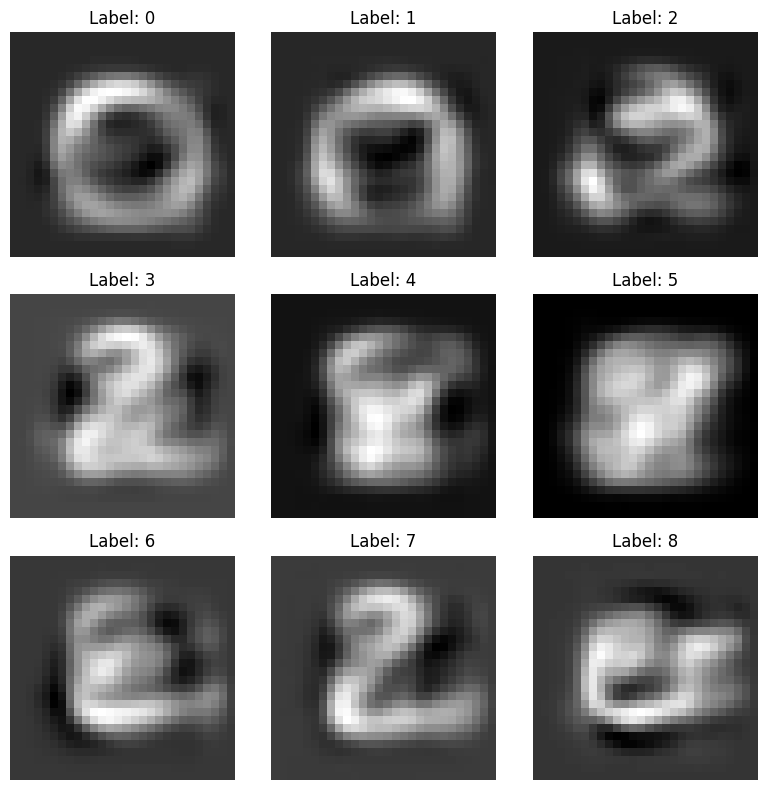

In [18]:
Data = CustomImageDataset(labels.values, df.values)
fig, axes = plt.subplots(3, 3, figsize=(8, 8))                      # Printing the images which are from Reverse PCA

for idx in range(9):
    pixel_values, label = Data[idx]
    image = pixel_values.reshape(28, 28)

    row_idx = idx // 3
    col_idx = idx % 3
    axes[row_idx, col_idx].imshow(image, cmap='gray')
    axes[row_idx, col_idx].set_title(f"Label: {label}")
    axes[row_idx, col_idx].axis('off')

plt.tight_layout()
plt.show()

## Applying the Auto encoding and Decoding to the KMINST data set

In [26]:
Data = CustomImageDataset(labels.values, pixels.values)

In [33]:
Data.pixels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Initializing and Training The Autoencoder Model

In [68]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np


class Autoencoder(nn.Module):
    def __init__(self, input_size, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

input_size = 784  # 28x28 images
encoding_dim = 32   # 32 bit encoding
batch_size=64      # batch size 64


model = Autoencoder(input_size, encoding_dim)    # Auto Encoder Model

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)   # Defining the loss function and optimizer

Data = CustomImageDataset(labels.values, pixels.values)

dataloader = DataLoader(Data, batch_size=batch_size, shuffle=True)

num_epochs = 100        # no Rpocs are 100
for epoch in range(num_epochs):
    for batch_data, _ in dataloader:
      batch_data = batch_data.to(torch.float32)  # Convert to the float data type
      optimizer.zero_grad()
      outputs = model(batch_data)



      loss = criterion(outputs, batch_data)
      loss.backward()
      optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')




Epoch [1/100], Loss: 6134.2412
Epoch [2/100], Loss: 6181.8691
Epoch [3/100], Loss: 6017.4277
Epoch [4/100], Loss: 6510.0659
Epoch [5/100], Loss: 6536.8354
Epoch [6/100], Loss: 6170.4355
Epoch [7/100], Loss: 5758.1206
Epoch [8/100], Loss: 5972.6021
Epoch [9/100], Loss: 6505.4390
Epoch [10/100], Loss: 6323.8599
Epoch [11/100], Loss: 5955.1997
Epoch [12/100], Loss: 6251.3140
Epoch [13/100], Loss: 6147.8042
Epoch [14/100], Loss: 6379.5767
Epoch [15/100], Loss: 6450.8711
Epoch [16/100], Loss: 6070.8213
Epoch [17/100], Loss: 6360.0962
Epoch [18/100], Loss: 6311.4570
Epoch [19/100], Loss: 5975.0586
Epoch [20/100], Loss: 6198.6274
Epoch [21/100], Loss: 5603.5308
Epoch [22/100], Loss: 5937.2959
Epoch [23/100], Loss: 6263.0859
Epoch [24/100], Loss: 5756.0527
Epoch [25/100], Loss: 5758.9380
Epoch [26/100], Loss: 6440.4902
Epoch [27/100], Loss: 6259.1787
Epoch [28/100], Loss: 6393.5981
Epoch [29/100], Loss: 6265.0996
Epoch [30/100], Loss: 6274.6455
Epoch [31/100], Loss: 6396.2202
Epoch [32/100], L

### Applying the Encoder on the data for checking

In [75]:
model.eval()

# Pass your input data through the encoder layers
with torch.no_grad():
    encoded_data = model.encoder(batch_data)


In [76]:
encoded_data.shape[0]

64

In [77]:
encoded_data.shape[1]      #### encoded into 32 feature data

32

### Applying the Encoder on Entire Data and converting it to 32 Features

In [78]:
import torch
import pandas as pd
from torch.utils.data import DataLoader


model.eval()

# Create a DataLoader for your dataset
dataloader = DataLoader(Data, batch_size=batch_size, shuffle=False)

# Initialize a list to store encoded representations
encoded_data_list = []

# Iterate through batches and encode data
with torch.no_grad():
    for batch_data, _ in dataloader:
        # Flatten the batch_data if needed
        # batch_data = batch_data.view(batch_data.size(0), -1)
        batch_data = batch_data.to(torch.float32)
        # Pass batch_data through the encoder
        encoded_data =model.encoder(batch_data)

        # Append encoded data to the list
        encoded_data_list.append(encoded_data.numpy())

encoded_data_array = np.concatenate(encoded_data_list, axis=0)


encoded_df = pd.DataFrame(encoded_data_array)

print(encoded_df)


             0    1          2    3    4          5          6         7   \
0      0.000000  0.0  11.617958  0.0  0.0  16.157875   5.810441  0.000000   
1      0.000000  0.0   7.476931  0.0  0.0  18.789280   6.754163  0.000000   
2      0.000000  0.0  11.146453  0.0  0.0  19.348837   2.060141  0.000000   
3      3.553170  0.0   1.561227  0.0  0.0   9.140028  14.864775  0.000000   
4      0.000000  0.0  11.871628  0.0  0.0  19.138527   5.570929  0.000000   
...         ...  ...        ...  ...  ...        ...        ...       ...   
10235  0.000000  0.0   3.938170  0.0  0.0  20.238405  13.536514  0.000000   
10236  1.532927  0.0   6.125024  0.0  0.0   6.901129   7.052642  1.160299   
10237  6.632079  0.0   6.913443  0.0  0.0   8.289896  13.339689  0.000000   
10238  1.810287  0.0   4.880815  0.0  0.0   7.483541   4.500338  2.413753   
10239  0.000000  0.0  14.719845  0.0  0.0  17.509989   1.632298  0.000000   

        8    9   ...         22         23   24   25   26   27   28        

### Decoding the Entire Data again to 784 features

In [79]:

model.eval()


decoded_data_list = []

for index, row in encoded_df.iterrows():
    # Convert the row to a PyTorch tensor
    encoded_data = torch.tensor(row.values, dtype=torch.float32)

    # Pass the encoded data through the decoder
    decoded_data =model.decoder(encoded_data)

    # Append decoded data to the list
    decoded_data_list.append(decoded_data.detach().numpy())

# Convert the list of decoded data to a NumPy array
decoded_data_array = np.array(decoded_data_list)
decoded_df = pd.DataFrame(decoded_data_array)



### now printing the images from Autoencoder Data

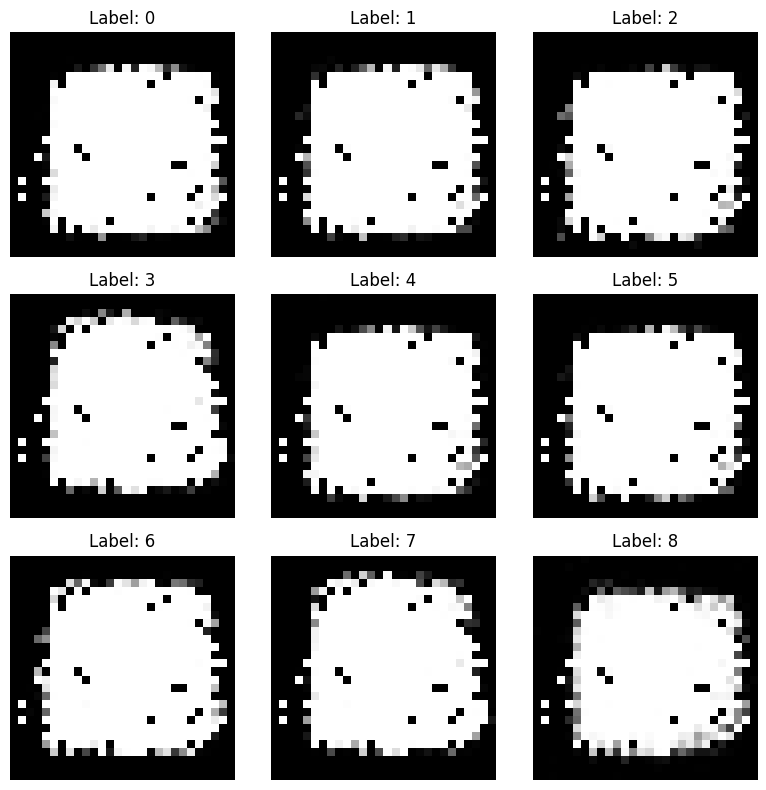

In [80]:
Data = CustomImageDataset(labels.values, decoded_df.values)
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for idx in range(9):
    pixel_values, label = Data[idx]
    image = pixel_values.reshape(28, 28)

    row_idx = idx // 3
    col_idx = idx % 3
    axes[row_idx, col_idx].imshow(image, cmap='gray')
    axes[row_idx, col_idx].set_title(f"Label: {label}")
    axes[row_idx, col_idx].axis('off')

plt.tight_layout()
plt.show()